<a href="https://colab.research.google.com/github/vandana-10/DataAnalyst_Intern_Projects/blob/main/Ecommerce_ReturnRate_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data PreProcessing

Imported all the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/Ecommerce_ReturnRate_dataset.csv")
data.head()

,Order_ID,Product_ID,Customer_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,Customer_Age,Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied,Customer_Location
0,ORD00000000,PROD00000000,USER00000000,05-08-2023,26-08-2024,Clothing,411.59,3,Size Issue,Returned,387.0,58,Female,City54,Gift Card,Next-Day,45.27,Fort Worth
1,ORD00000001,PROD00000001,USER00000001,09-10-2023,09-11-2023,Books,288.88,3,Other,Returned,31.0,68,Female,City85,Credit Card,Express,47.79,Phoenix
2,ORD00000002,PROD00000002,USER00000002,06-05-2023,NaN,Toys,390.03,5,Changed Mind,Returned,NaN,22,Female,City30,Gift Card,Next-Day,26.64,Charlotte
3,ORD00000003,PROD00000003,USER00000003,29-08-2024,NaN,Toys,401.09,3,Changed Mind,Returned,NaN,40,Female,City95,PayPal,Next-Day,15.37,Houston
4,ORD00000004,PROD00000004,USER00000004,16-01-2023,NaN,Books,110.09,4,Wrong Item,Returned,NaN,34,Female,City80,Gift Card,Standard,16.37,San Francisco


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_ID           10000 non-null  object 
 1   Product_ID         10000 non-null  object 
 2   Customer_ID        10000 non-null  object 
 3   Order_Date         10000 non-null  object 
 4   Return_Date        5052 non-null   object 
 5   Product_Category   10000 non-null  object 
 6   Product_Price      10000 non-null  float64
 7   Order_Quantity     10000 non-null  int64  
 8   Return_Reason      9700 non-null   object 
 9   Return_Status      8553 non-null   object 
 10  Days_to_Return     5052 non-null   float64
 11  Customer_Age       10000 non-null  int64  
 12  Gender             10000 non-null  object 
 13  User_Location      10000 non-null  object 
 14  Payment_Method     10000 non-null  object 
 15  Shipping_Method    10000 non-null  object 
 16  Discount_Applied   1000

In [ ]:
data.shape

(10000, 18)

In [ ]:
data.describe()

,Product_Price,Order_Quantity,Days_to_Return,Customer_Age,Discount_Applied
count,10000.000000,10000.000000,5052.000000,10000.000000,10000.000000
mean,252.369307,3.006100,1.453682,44.195000,24.992162
std,142.883865,1.406791,297.983208,15.311983,14.363396
min,5.010000,1.000000,-719.000000,18.000000,0.000000
25%,128.650000,2.000000,-214.000000,31.000000,12.752500
50%,250.445000,3.000000,1.000000,44.000000,24.840000
75%,377.837500,4.000000,218.000000,57.000000,37.605000
max,499.890000,5.000000,726.000000,70.000000,50.000000


# Checking duplicates

After Checking Duplicates 0 rows are returned so, this Dataset doesn't have duplicates

In [ ]:
data_Dup = data[data.duplicated()]
data_Dup

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,Customer_Age,Gender,Payment_Method,Shipping_Method,Discount_Applied,CustomerLocation


In [ ]:
data = data.drop_duplicates()


# Checking Null Values

In this Dataset , 4 Columns has Null Values which are Return_Reason,
 Return_Status, Return_Date, Days_to_Return

In [ ]:
data.isnull().sum()

,0
Order_ID,0
Product_ID,0
Customer_ID,0
Order_Date,0
Return_Date,4948
Product_Category,0
Product_Price,0
Order_Quantity,0
Return_Reason,300
Return_Status,1447


#Handling the  Null Values

In [ ]:
data['Return_Reason'] = data['Return_Reason'].astype(str)

In Return_Reason Columns there are Null values and some other Values and I filled them as Unknown

In [ ]:
data['Return_Reason'].unique()

array(['Size Issue', 'Other', 'Changed Mind', 'Wrong Item', 'Damaged',
       'Late Delivery', nan, '???'], dtype=object)

In [ ]:
count = (data['Return_Reason'] == '???').sum()
count

np.int64(200)

In [ ]:
# Count '??' for each column
count_all = (data == '???').sum()
print(count_all)


Order_ID               0
Product_ID             0
Customer_ID            0
Order_Date             0
Return_Date            0
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason        200
Return_Status          0
Days_to_Return         0
Customer_Age           0
Gender                 0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
Customer_Location      0
dtype: int64


In [ ]:
data.loc[data['Return_Reason']=='???']

,Order_ID,Product_ID,Customer_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,Customer_Age,Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied,Customer_Location
41,ORD00000041,PROD00000041,USER00000041,03-01-2024,15-01-2023,Books,334.27,4,???,Returned,-353.0,69,Female,City81,PayPal,Express,43.44,Nashville
61,ORD00000061,PROD00000061,USER00000061,06-11-2024,NaN,Home,344.60,4,???,Returned,NaN,28,Female,City80,PayPal,Next-Day,40.95,Indianapolis
122,ORD00000122,PROD00000122,USER00000122,12-06-2024,NaN,Home,400.21,3,???,Returned,NaN,69,Female,City20,PayPal,Standard,36.32,Jacksonville
205,ORD00000205,PROD00000205,USER00000205,28-12-2024,NaN,Home,317.90,4,???,Returned,NaN,68,Female,City98,Credit Card,Next-Day,29.84,Columbus
257,ORD00000257,PROD00000257,USER00000257,03-05-2023,NaN,Toys,46.83,5,???,Returned,NaN,27,Female,City65,Debit Card,Standard,17.12,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9878,ORD00009878,PROD00009878,USER00009878,07-10-2023,09-06-2024,Toys,211.10,1,???,Returned,246.0,42,Male,City4,Credit Card,Express,20.01,Louisville
9880,ORD00009880,PROD00009880,USER00009880,07-10-2023,NaN,Home,52.36,1,???,Not Returned,NaN,67,Male,City63,PayPal,Standard,1.59,El Paso
9905,ORD00009905,PROD00009905,USER00009905,22-05-2023,NaN,Toys,346.52,4,???,Not Returned,NaN,30,Female,City58,PayPal,Standard,20.98,San Antonio
9944,ORD00009944,PROD00009944,USER00009944,12-08-2023,NaN,Electronics,218.32,5,???,Not Returned,NaN,18,Male,City65,Credit Card,Next-Day,2.73,San Antonio


In [ ]:
data['Return_Reason'] = data['Return_Reason'].fillna('No Reason')
data['Return_Reason']

,Return_Reason
0,Size Issue
1,Other
2,Changed Mind
3,Changed Mind
4,Wrong Item
...,...
9995,Late Delivery
9996,Late Delivery
9997,Other
9998,Size Issue


In [ ]:
data = data.replace('???', 'Unknown')
data.head()

,Order_ID,Product_ID,Customer_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,Customer_Age,Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied,Customer_Location
0,ORD00000000,PROD00000000,USER00000000,05-08-2023,26-08-2024,Clothing,411.59,3,Size Issue,Returned,387.0,58,Female,City54,Gift Card,Next-Day,45.27,Fort Worth
1,ORD00000001,PROD00000001,USER00000001,09-10-2023,09-11-2023,Books,288.88,3,Other,Returned,31.0,68,Female,City85,Credit Card,Express,47.79,Phoenix
2,ORD00000002,PROD00000002,USER00000002,06-05-2023,NaN,Toys,390.03,5,Changed Mind,Returned,NaN,22,Female,City30,Gift Card,Next-Day,26.64,Charlotte
3,ORD00000003,PROD00000003,USER00000003,29-08-2024,NaN,Toys,401.09,3,Changed Mind,Returned,NaN,40,Female,City95,PayPal,Next-Day,15.37,Houston
4,ORD00000004,PROD00000004,USER00000004,16-01-2023,NaN,Books,110.09,4,Wrong Item,Returned,NaN,34,Female,City80,Gift Card,Standard,16.37,San Francisco


In [ ]:
data['Return_Reason'].unique()

array(['Size Issue', 'Other', 'Changed Mind', 'Wrong Item', 'Damaged',
       'Late Delivery', 'No Reason', 'Unknown'], dtype=object)

In [ ]:
data['Return_Status'] = data['Return_Status'].fillna("No Status")
data['Return_Status']

,Return_Status
0,Returned
1,Returned
2,Returned
3,Returned
4,Returned
...,...
9995,Not Returned
9996,Not Returned
9997,Not Returned
9998,Not Returned


In [ ]:
data['Return_Date'] = data['Return_Date'].fillna("No Return Date")
data['Return_Date']

,Return_Date
0,26-08-2024
1,09-11-2023
2,No Return Date
3,No Return Date
4,No Return Date
...,...
9995,No Return Date
9996,No Return Date
9997,No Return Date
9998,No Return Date


Days_to_Return is a  Numerical Columns so, I use Mean to fill the Null Values.
The Distribution of Column is Normal and  I use Mean function to fill the Null Values.

<ipython-input-19-c4571e69bc34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Days_to_Return'])


<Axes: xlabel='Days_to_Return', ylabel='Density'>

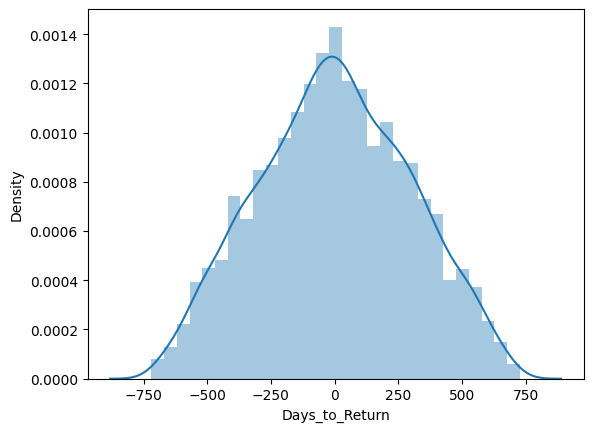

In [ ]:
import seaborn as sns
sns.distplot(data['Days_to_Return'])

In [ ]:
value = data['Days_to_Return'].mean()
data['Days_to_Return'].fillna(value,inplace= True)

**Dropping the unnecessary Columns**

In [ ]:
data = data.drop('User_Location',axis=1)
data = data.drop('Discount_Applied',axis=1)

In [ ]:
data.columns

Index(['Order_ID', 'Product_ID', 'Customer_ID', 'Order_Date', 'Return_Date',
       'Product_Category', 'Product_Price', 'Order_Quantity', 'Return_Reason',
       'Return_Status', 'Days_to_Return', 'Customer_Age', 'Gender',
       'Payment_Method', 'Shipping_Method', 'Customer_Location'],
      dtype='object')

In [ ]:
data.shape

(10000, 16)

In [ ]:
data.isnull().sum()

,0
Order_ID,0
Product_ID,0
Customer_ID,0
Order_Date,0
Return_Date,0
Product_Category,0
Product_Price,0
Order_Quantity,0
Return_Reason,0
Return_Status,0


In [ ]:
data_nan_values = data[data.isnull().any(axis=1)]
data_nan_values

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,User_Age,User_Gender,Payment_Method,Shipping_Method,Customer_Location


In [ ]:

#I downloaded the file to perform SQL Operations to get High Risk Products.
# Save locally
data.to_csv('my_data.csv', index=False)
from google.colab import files
files.download('my_data.csv')


# Checking Outliers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


<Axes: ylabel='Product_Price'>

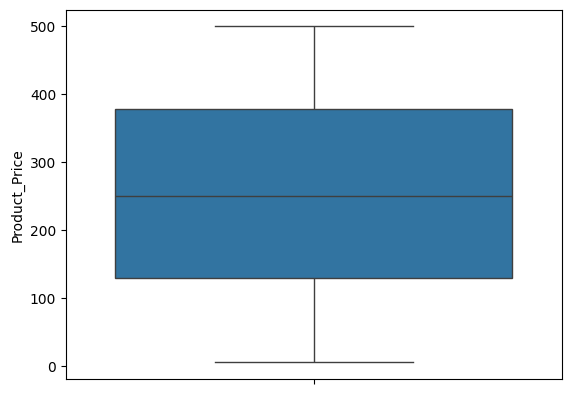

In [ ]:
sns.boxplot(data['Product_Price'])

<Axes: ylabel='Order_Quantity'>

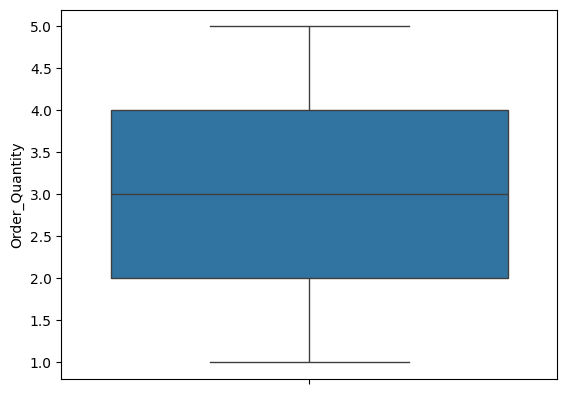

In [ ]:
sns.boxplot(data['Order_Quantity'])

# Calculating the Return %

In [ ]:
# Checking the Unique values in return_Status column

print(data['Return_Status'].unique())


['Returned' 'No Status' 'Not Returned']


In [ ]:
print(data['Return_Status'].value_counts())


Return_Status
Returned        5663
Not Returned    2890
No Status       1447
Name: count, dtype: int64


To calculate return percentage (Return%),

Return %
=
(
Number of Returned Orders/
Total Orders
)
×
100


In [ ]:
# Clean the column to avoid hidden spaces or capitalization issues
#.strip() is a method used to remove any leading and trailing spaces from strings.

data['Return_Status']  = data['Return_Status'] .str.strip().str.lower()

# Now calculate return %
return_percentage = (data['Return_Status'] == 'returned').sum() / len(data) * 100

print(f"Return %: {return_percentage:.2f}%")  # .2f Rounding the values to 2 decimals.


Return %: 56.63%


# Explatory Data Analysis (EDA)

**Visualisation on Return %**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-97-b68feb1ac4c2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_counts.index, y=return_counts.values, palette='Set2')


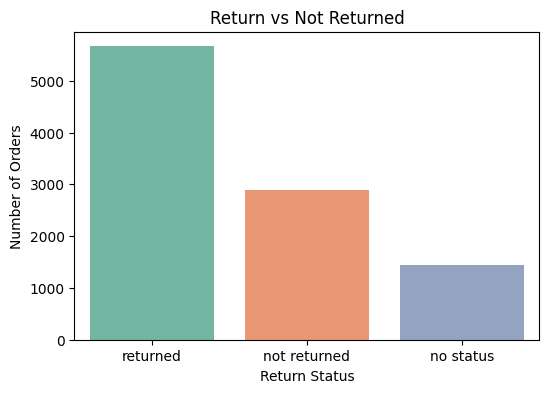

In [ ]:

# Count of Returned vs Not Returned
return_counts = data['Return_Status'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=return_counts.index, y=return_counts.values, palette='Set2')
plt.title('Return vs Not Returned')
plt.ylabel('Number of Orders')
plt.xlabel('Return Status')
plt.show()


Most of the Products are Shipped on the Next day of Return

<ipython-input-102-e3dd72ad715e>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shipping_return_percentage = data.groupby('Shipping_Method').apply(lambda x: (x['Return_Status'] == 'Returned').mean() * 100).reset_index()


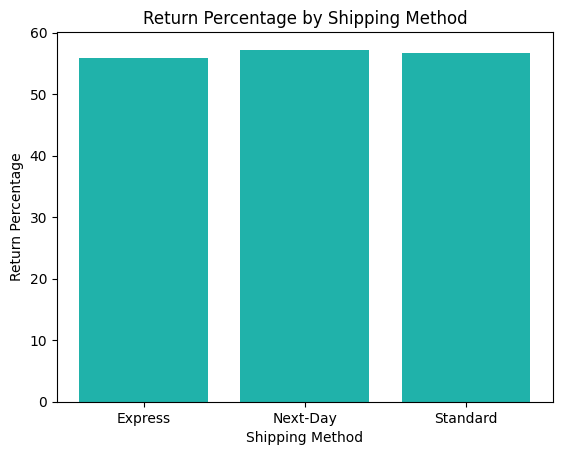

In [ ]:
data['Return_Status'] = data['Return_Status'].str.strip().str.title()
# Calculate return percentage by shipping method
shipping_return_percentage = data.groupby('Shipping_Method').apply(lambda x: (x['Return_Status'] == 'Returned').mean() * 100).reset_index()
shipping_return_percentage.columns = ['Shipping_Method', 'Return_Percentage']

# Plotting return percentage by shipping method
plt.bar(shipping_return_percentage['Shipping_Method'], shipping_return_percentage['Return_Percentage'], color='lightseagreen')
plt.xlabel('Shipping Method')
plt.ylabel('Return Percentage')
plt.title('Return Percentage by Shipping Method')
plt.show()


Gift Card has Highest Returnpercentage among all the Payment Options because of Benefit in  GiftCard the amount will Refund within the 2 hours or next day.So , Most of the Customers are using this payment Option

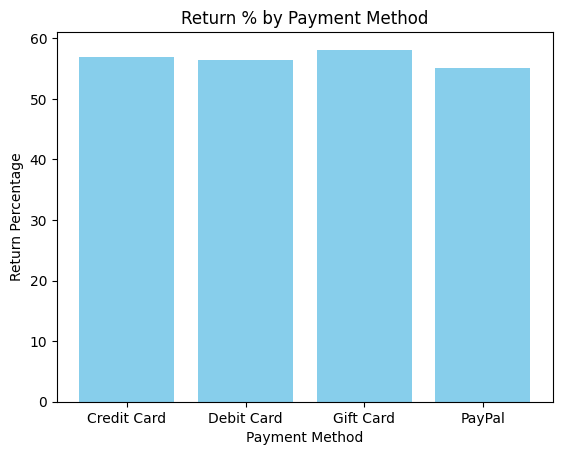

In [ ]:
data['Return_Status'] = data['Return_Status'].str.strip().str.title()


# Correct: calculate return percentage by payment method
payment_return_percentage = data.groupby('Payment_Method')['Return_Status'].apply(lambda x: (x == 'Returned').mean() * 100).reset_index()

payment_return_percentage.columns = ['Payment_Method', 'Return_Percentage']

# Plotting
plt.bar(payment_return_percentage['Payment_Method'], payment_return_percentage['Return_Percentage'], color='skyblue')
plt.xlabel('Payment Method')
plt.ylabel('Return Percentage')
plt.title('Return % by Payment Method')
plt.show()


Most of Returns are occured on Same day or immediate day

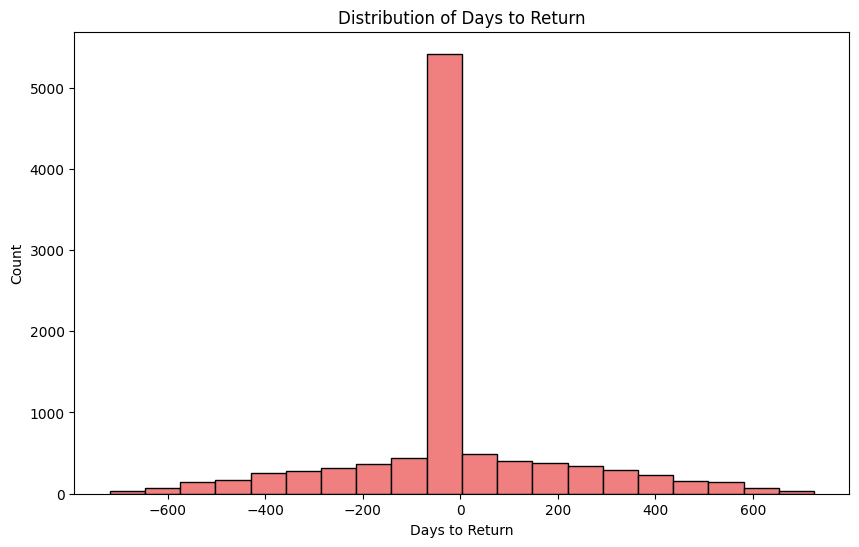

In [ ]:
# Plotting the distribution of return days (Days_to_Return)
plt.figure(figsize=(10,6))
plt.hist(data['Days_to_Return'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Days to Return')
plt.ylabel('Count')
plt.title('Distribution of Days to Return')
plt.show()


Most of the Females are Returning Products than Males

<ipython-input-104-6e89cf5616d2>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Gender_return_percentage = data.groupby('Gender').apply(lambda x: (x['Return_Status'] == 'Returned').mean() * 100).reset_index()


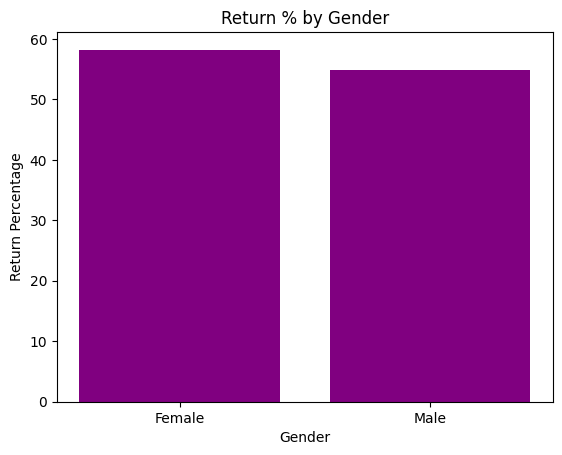

In [ ]:
Gender_return_percentage = data.groupby('Gender').apply(lambda x: (x['Return_Status'] == 'Returned').mean() * 100).reset_index()
Gender_return_percentage.columns = ['Gender', 'Return_Percentage']

# Plotting return percentage by Gender
plt.bar(Gender_return_percentage['Gender'], Gender_return_percentage['Return_Percentage'], color='Purple')
plt.xlabel("Gender")
plt.ylabel('Return Percentage')
plt.title('Return % by Gender')
plt.show()

In Product_Category Clothing has highest Return Precentage and Lowest is Home Accessories.

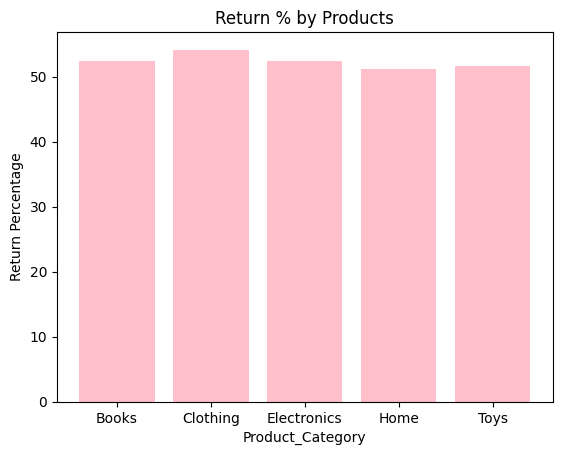

In [ ]:
Product_return_percentage = data.groupby('Product_Category').apply(lambda x: (x['Return_Status'] == 'Returned').mean() * 100).reset_index()
Product_return_percentage.columns = ['Product_Category', 'Return_Percentage']

# Plotting return percentage by Product_Category
plt.bar(Product_return_percentage['Product_Category'], Gender_return_percentage['Return_Percentage'], color='Pink')
plt.xlabel("Product_Category")
plt.ylabel('Return Percentage')
plt.title('Return % by Products')
plt.show()

In [ ]:
data.head()

,Order_ID,Product_ID,Customer_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,Customer_Age,Gender,Payment_Method,Shipping_Method,Customer_Location
0,ORD00000000,PROD00000000,USER00000000,05-08-2023,26-08-2024,Clothing,411.59,3,Size Issue,Returned,387.0,58,Female,Gift Card,Next-Day,Fort Worth
1,ORD00000001,PROD00000001,USER00000001,09-10-2023,09-11-2023,Books,288.88,3,Other,Returned,31.0,68,Female,Credit Card,Express,Phoenix
2,ORD00000002,PROD00000002,USER00000002,06-05-2023,No Return Date,Toys,390.03,5,Changed Mind,Returned,0.0,22,Female,Gift Card,Next-Day,Charlotte
3,ORD00000003,PROD00000003,USER00000003,29-08-2024,No Return Date,Toys,401.09,3,Changed Mind,Returned,0.0,40,Female,PayPal,Next-Day,Houston
4,ORD00000004,PROD00000004,USER00000004,16-01-2023,No Return Date,Books,110.09,4,Wrong Item,Returned,0.0,34,Female,Gift Card,Standard,San Francisco


These are Object type Columns and also are not Necessary for Model Prediction. So, I dropped those Columns

In [ ]:
data = data.drop(columns= ['Order_ID'] , axis = 1)
data = data.drop(columns= 'Product_ID', axis = 1)
data = data.drop(columns= "Customer_ID", axis = 1)


In [ ]:
data.dtypes

,0
Order_Date,object
Return_Date,object
Product_Category,object
Product_Price,float64
Order_Quantity,int64
Return_Reason,object
Return_Status,object
Days_to_Return,float64
Customer_Age,int64
Gender,object


In [ ]:
data.head()

,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,Customer_Age,Gender,Payment_Method,Shipping_Method,Customer_Location
0,05-08-2023,26-08-2024,Clothing,411.59,3,Size Issue,Returned,387.000000,58,Female,Gift Card,Next-Day,Fort Worth
1,09-10-2023,09-11-2023,Books,288.88,3,Other,Returned,31.000000,68,Female,Credit Card,Express,Phoenix
2,06-05-2023,No Return Date,Toys,390.03,5,Changed Mind,Returned,1.453682,22,Female,Gift Card,Next-Day,Charlotte
3,29-08-2024,No Return Date,Toys,401.09,3,Changed Mind,Returned,1.453682,40,Female,PayPal,Next-Day,Houston
4,16-01-2023,No Return Date,Books,110.09,4,Wrong Item,Returned,1.453682,34,Female,Gift Card,Standard,San Francisco


# Encoding

Converting Cateorical Columns into Numerical Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()


In [ ]:
data.columns

Index(['Order_Date', 'Return_Date', 'Product_Category', 'Product_Price',
       'Order_Quantity', 'Return_Reason', 'Return_Status', 'Days_to_Return',
       'Customer_Age', 'Gender', 'Payment_Method', 'Shipping_Method',
       'Customer_Location'],
      dtype='object')

In [ ]:
data= pd.get_dummies(data, columns=['Product_Category'], prefix='Category', dtype=int)
data.head()

,Order_Date,Return_Date,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,Customer_Age,Gender,Payment_Method,Shipping_Method,Customer_Location,Category_Books,Category_Clothing,Category_Electronics,Category_Home,Category_Toys
0,05-08-2023,26-08-2024,411.59,3,Size Issue,Returned,387.000000,58,Female,Gift Card,Next-Day,Fort Worth,0,1,0,0,0
1,09-10-2023,09-11-2023,288.88,3,Other,Returned,31.000000,68,Female,Credit Card,Express,Phoenix,1,0,0,0,0
2,06-05-2023,No Return Date,390.03,5,Changed Mind,Returned,1.453682,22,Female,Gift Card,Next-Day,Charlotte,0,0,0,0,1
3,29-08-2024,No Return Date,401.09,3,Changed Mind,Returned,1.453682,40,Female,PayPal,Next-Day,Houston,0,0,0,0,1
4,16-01-2023,No Return Date,110.09,4,Wrong Item,Returned,1.453682,34,Female,Gift Card,Standard,San Francisco,1,0,0,0,0


In [ ]:
data= pd.get_dummies(data,columns=['Return_Status'],prefix='Status', dtype=int)
data.head()

,Order_Date,Return_Date,Product_Price,Order_Quantity,Return_Reason,Days_to_Return,Customer_Age,Gender,Payment_Method,Shipping_Method,Customer_Location,Category_Books,Category_Clothing,Category_Electronics,Category_Home,Category_Toys,Status_No Status,Status_Not Returned,Status_Returned
0,05-08-2023,26-08-2024,411.59,3,Size Issue,387.000000,58,Female,Gift Card,Next-Day,Fort Worth,0,1,0,0,0,0,0,1
1,09-10-2023,09-11-2023,288.88,3,Other,31.000000,68,Female,Credit Card,Express,Phoenix,1,0,0,0,0,0,0,1
2,06-05-2023,No Return Date,390.03,5,Changed Mind,1.453682,22,Female,Gift Card,Next-Day,Charlotte,0,0,0,0,1,0,0,1
3,29-08-2024,No Return Date,401.09,3,Changed Mind,1.453682,40,Female,PayPal,Next-Day,Houston,0,0,0,0,1,0,0,1
4,16-01-2023,No Return Date,110.09,4,Wrong Item,1.453682,34,Female,Gift Card,Standard,San Francisco,1,0,0,0,0,0,0,1


In [ ]:
data = data.drop(columns = ['Status_No Status'])  # Dropped the Unuseful Column

In [ ]:
data.columns

Index(['Order_Date', 'Return_Date', 'Product_Price', 'Order_Quantity',
       'Return_Reason', 'Days_to_Return', 'Customer_Age', 'Gender',
       'Payment_Method', 'Shipping_Method', 'Customer_Location',
       'Category_Books', 'Category_Clothing', 'Category_Electronics',
       'Category_Home', 'Category_Toys', 'Status_Not Returned',
       'Status_Returned'],
      dtype='object')

In [ ]:
data= pd.get_dummies(data,columns=['Return_Reason'],prefix='Reason', dtype=int)
data.head()

,Order_Date,Return_Date,Product_Price,Order_Quantity,Days_to_Return,Customer_Age,Gender,Payment_Method,Shipping_Method,Customer_Location,...,Status_Not Returned,Status_Returned,Reason_Changed Mind,Reason_Damaged,Reason_Late Delivery,Reason_No Reason,Reason_Other,Reason_Size Issue,Reason_Unknown,Reason_Wrong Item
0,05-08-2023,26-08-2024,411.59,3,387.000000,58,Female,Gift Card,Next-Day,Fort Worth,...,0,1,0,0,0,0,0,1,0,0
1,09-10-2023,09-11-2023,288.88,3,31.000000,68,Female,Credit Card,Express,Phoenix,...,0,1,0,0,0,0,1,0,0,0
2,06-05-2023,No Return Date,390.03,5,1.453682,22,Female,Gift Card,Next-Day,Charlotte,...,0,1,1,0,0,0,0,0,0,0
3,29-08-2024,No Return Date,401.09,3,1.453682,40,Female,PayPal,Next-Day,Houston,...,0,1,1,0,0,0,0,0,0,0
4,16-01-2023,No Return Date,110.09,4,1.453682,34,Female,Gift Card,Standard,San Francisco,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
data = data.drop(columns = ['Reason_Unknown'])
data = data.drop(columns = ['Reason_No Reason'])

In [ ]:
data.columns

Index(['Order_Date', 'Return_Date', 'Product_Price', 'Order_Quantity',
       'Days_to_Return', 'Customer_Age', 'Gender', 'Payment_Method',
       'Shipping_Method', 'Customer_Location', 'Category_Books',
       'Category_Clothing', 'Category_Electronics', 'Category_Home',
       'Category_Toys', 'Status_Not Returned', 'Status_Returned',
       'Reason_Changed Mind', 'Reason_Damaged', 'Reason_Late Delivery',
       'Reason_Other', 'Reason_Size Issue', 'Reason_Wrong Item'],
      dtype='object')

In [ ]:
data= pd.get_dummies(data,columns=['Payment_Method'],prefix='Payment', dtype=int)
data.head()

,Order_Date,Return_Date,Product_Price,Order_Quantity,Days_to_Return,Customer_Age,Gender,Shipping_Method,Customer_Location,Category_Books,...,Reason_Changed Mind,Reason_Damaged,Reason_Late Delivery,Reason_Other,Reason_Size Issue,Reason_Wrong Item,Payment_Credit Card,Payment_Debit Card,Payment_Gift Card,Payment_PayPal
0,05-08-2023,26-08-2024,411.59,3,387.000000,58,Female,Next-Day,Fort Worth,0,...,0,0,0,0,1,0,0,0,1,0
1,09-10-2023,09-11-2023,288.88,3,31.000000,68,Female,Express,Phoenix,1,...,0,0,0,1,0,0,1,0,0,0
2,06-05-2023,No Return Date,390.03,5,1.453682,22,Female,Next-Day,Charlotte,0,...,1,0,0,0,0,0,0,0,1,0
3,29-08-2024,No Return Date,401.09,3,1.453682,40,Female,Next-Day,Houston,0,...,1,0,0,0,0,0,0,0,0,1
4,16-01-2023,No Return Date,110.09,4,1.453682,34,Female,Standard,San Francisco,1,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
data= pd.get_dummies(data,columns=['Shipping_Method'],prefix='Shipping', dtype=int)
data.head()

,Order_Date,Return_Date,Product_Price,Order_Quantity,Days_to_Return,Customer_Age,Gender,Customer_Location,Category_Books,Category_Clothing,...,Reason_Other,Reason_Size Issue,Reason_Wrong Item,Payment_Credit Card,Payment_Debit Card,Payment_Gift Card,Payment_PayPal,Shipping_Express,Shipping_Next-Day,Shipping_Standard
0,05-08-2023,26-08-2024,411.59,3,387.000000,58,Female,Fort Worth,0,1,...,0,1,0,0,0,1,0,0,1,0
1,09-10-2023,09-11-2023,288.88,3,31.000000,68,Female,Phoenix,1,0,...,1,0,0,1,0,0,0,1,0,0
2,06-05-2023,No Return Date,390.03,5,1.453682,22,Female,Charlotte,0,0,...,0,0,0,0,0,1,0,0,1,0
3,29-08-2024,No Return Date,401.09,3,1.453682,40,Female,Houston,0,0,...,0,0,0,0,0,0,1,0,1,0
4,16-01-2023,No Return Date,110.09,4,1.453682,34,Female,San Francisco,1,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [ ]:
data.head()

,Order_Date,Return_Date,Product_Price,Order_Quantity,Days_to_Return,Customer_Age,Gender,Customer_Location,Category_Books,Category_Clothing,...,Reason_Other,Reason_Size Issue,Reason_Wrong Item,Payment_Credit Card,Payment_Debit Card,Payment_Gift Card,Payment_PayPal,Shipping_Express,Shipping_Next-Day,Shipping_Standard
0,05-08-2023,26-08-2024,411.59,3,387.000000,58,0,Fort Worth,0,1,...,0,1,0,0,0,1,0,0,1,0
1,09-10-2023,09-11-2023,288.88,3,31.000000,68,0,Phoenix,1,0,...,1,0,0,1,0,0,0,1,0,0
2,06-05-2023,No Return Date,390.03,5,1.453682,22,0,Charlotte,0,0,...,0,0,0,0,0,1,0,0,1,0
3,29-08-2024,No Return Date,401.09,3,1.453682,40,0,Houston,0,0,...,0,0,0,0,0,0,1,0,1,0
4,16-01-2023,No Return Date,110.09,4,1.453682,34,0,San Francisco,1,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
data.Customer_Location.unique()

array(['Fort Worth', 'Phoenix', 'Charlotte', 'Houston', 'San Francisco',
       'Jacksonville', 'San Jose', 'Louisville', 'Portland', 'Nashville',
       'Chicago', 'Las Vegas', 'Los Angeles', 'Detroit', 'Memphis',
       'Denver', 'Oklahoma City', 'Columbus', 'San Diego', 'Boston',
       'New York', 'Philadelphia', 'El Paso', 'Seattle', 'Indianapolis',
       'Washington', 'Dallas', 'Baltimore', 'Austin', 'San Antonio'],
      dtype=object)

In [ ]:
data= pd.get_dummies(data,columns=['Customer_Location'],prefix='City', dtype=int)
data.head()

,Order_Date,Return_Date,Product_Price,Order_Quantity,Days_to_Return,Customer_Age,Gender,Category_Books,Category_Clothing,Category_Electronics,...,City_Oklahoma City,City_Philadelphia,City_Phoenix,City_Portland,City_San Antonio,City_San Diego,City_San Francisco,City_San Jose,City_Seattle,City_Washington
0,05-08-2023,26-08-2024,411.59,3,387.000000,58,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,09-10-2023,09-11-2023,288.88,3,31.000000,68,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,06-05-2023,No Return Date,390.03,5,1.453682,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29-08-2024,No Return Date,401.09,3,1.453682,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16-01-2023,No Return Date,110.09,4,1.453682,34,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data = data.drop(['Order_Date', 'Return_Date'], axis=1)

In [ ]:
data.columns

Index(['Product_Price', 'Order_Quantity', 'Days_to_Return', 'Customer_Age',
       'Gender', 'Category_Books', 'Category_Clothing', 'Category_Electronics',
       'Category_Home', 'Category_Toys', 'Status_Not Returned',
       'Status_Returned', 'Reason_Changed Mind', 'Reason_Damaged',
       'Reason_Late Delivery', 'Reason_Other', 'Reason_Size Issue',
       'Reason_Wrong Item', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_Gift Card', 'Payment_PayPal', 'Shipping_Express',
       'Shipping_Next-Day', 'Shipping_Standard', 'City_Austin',
       'City_Baltimore', 'City_Boston', 'City_Charlotte', 'City_Chicago',
       'City_Columbus', 'City_Dallas', 'City_Denver', 'City_Detroit',
       'City_El Paso', 'City_Fort Worth', 'City_Houston', 'City_Indianapolis',
       'City_Jacksonville', 'City_Las Vegas', 'City_Los Angeles',
       'City_Louisville', 'City_Memphis', 'City_Nashville', 'City_New York',
       'City_Oklahoma City', 'City_Philadelphia', 'City_Phoenix',
       'Ci

#Correlation

In [ ]:
data = data.corr()
data

,Product_Price,Order_Quantity,Days_to_Return,Customer_Age,Gender,Category_Books,Category_Clothing,Category_Electronics,Category_Home,Category_Toys,...,City_Oklahoma City,City_Philadelphia,City_Phoenix,City_Portland,City_San Antonio,City_San Diego,City_San Francisco,City_San Jose,City_Seattle,City_Washington
Product_Price,1.000000,0.019757,9.378477e-03,0.009595,-0.006994,-0.009539,0.008274,-0.000524,-0.008942,0.010970,...,-0.012170,0.001487,0.018044,0.004675,-0.000357,-0.006942,0.007628,0.016769,-0.003165,-0.012532
Order_Quantity,0.019757,1.000000,3.356821e-04,0.008065,0.020894,-0.000256,-0.005189,-0.010713,0.017959,-0.001951,...,0.007557,-0.013353,-0.010820,-0.008304,0.007128,0.021088,0.008004,0.007017,-0.013825,-0.018835
Days_to_Return,0.009378,0.000336,1.000000e+00,-0.008823,-0.005947,0.019642,-0.001021,-0.024198,0.007018,-0.001717,...,0.007542,0.003154,0.000101,-0.004011,0.000950,-0.014320,-0.002771,-0.011420,0.008502,0.025736
Customer_Age,0.009595,0.008065,-8.822851e-03,1.000000,0.000383,-0.002236,-0.004882,-0.004439,0.009453,0.002078,...,0.000414,0.004800,0.003204,0.001685,-0.007323,0.015895,-0.003962,0.008612,0.005871,0.012067
Gender,-0.006994,0.020894,-5.947341e-03,0.000383,1.000000,0.006353,-0.005305,-0.007240,0.012965,-0.006989,...,-0.020620,-0.002754,0.001302,-0.005231,-0.000108,0.004870,0.005863,0.010080,-0.002510,0.005140
Category_Books,-0.009539,-0.000256,1.964244e-02,-0.002236,0.006353,1.000000,-0.253199,-0.252012,-0.255571,-0.248760,...,-0.003298,-0.007272,0.007434,-0.003549,0.006237,-0.006556,-0.002951,0.001044,-0.000124,0.017724
Category_Clothing,0.008274,-0.005189,-1.021014e-03,-0.004882,-0.005305,-0.253199,1.000000,-0.248828,-0.252342,-0.245617,...,0.008052,-0.002666,-0.005404,-0.003052,-0.002403,0.004952,0.019376,0.002885,-0.005447,-0.009869
Category_Electronics,-0.000524,-0.010713,-2.419818e-02,-0.004439,-0.007240,-0.252012,-0.248828,1.000000,-0.251158,-0.244465,...,-0.011385,0.015438,0.004786,0.007379,-0.001679,0.005674,-0.004934,-0.010900,0.002402,-0.004966
Category_Home,-0.008942,0.017959,7.018445e-03,0.009453,0.012965,-0.255571,-0.252342,-0.251158,1.000000,-0.247918,...,0.014573,0.019760,-0.009492,-0.012704,0.001471,0.003521,-0.002477,0.010141,-0.001058,-0.012583
Category_Toys,0.010970,-0.001951,-1.716884e-03,0.002078,-0.006989,-0.248760,-0.245617,-0.244465,-0.247918,1.000000,...,-0.008117,-0.025543,0.002715,0.012174,-0.003726,-0.007626,-0.009089,-0.003301,0.004287,0.009719


<Axes: >

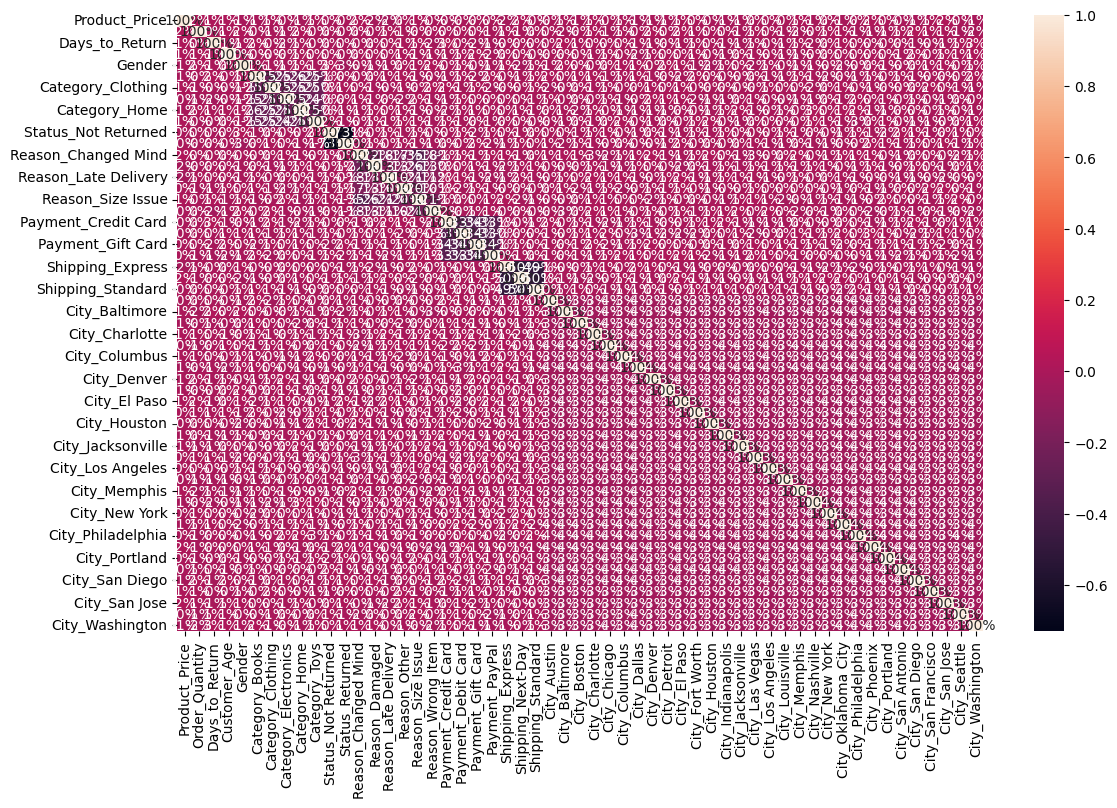

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),fmt='.0%',annot=True)

# Splitting the Data into Training and Testing

In [ ]:
# Set features (drop both target columns from X)
X = data.drop(['Status_Not Returned', 'Status_Returned'], axis=1)
Y = data['Status_Returned']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
X.isnull().sum()

,0
Product_Price,0
Order_Quantity,0
Days_to_Return,0
Customer_Age,0
Gender,0
Category_Books,0
Category_Clothing,0
Category_Electronics,0
Category_Home,0
Category_Toys,0


In [ ]:
Y.isnull().sum()

np.int64(0)

#Logistic_Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
print(X_train.dtypes)


Product_Price           float64
Order_Quantity            int64
Days_to_Return          float64
Customer_Age              int64
Gender                    int64
Category_Books            int64
Category_Clothing         int64
Category_Electronics      int64
Category_Home             int64
Category_Toys             int64
Reason_Changed Mind       int64
Reason_Damaged            int64
Reason_Late Delivery      int64
Reason_Other              int64
Reason_Size Issue         int64
Reason_Wrong Item         int64
Payment_Credit Card       int64
Payment_Debit Card        int64
Payment_Gift Card         int64
Payment_PayPal            int64
Shipping_Express          int64
Shipping_Next-Day         int64
Shipping_Standard         int64
City_Austin               int64
City_Baltimore            int64
City_Boston               int64
City_Charlotte            int64
City_Chicago              int64
City_Columbus             int64
City_Dallas               int64
City_Denver               int64
City_Det

In [ ]:
LR = LogisticRegression()
LR.fit(X_train,y_train)


LogisticRegression()

In [ ]:
LR.score(X_train,y_train)

0.564

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = LR.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

#Evaluation Metrics

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, classification_report
)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("🔍 Evaluation Metrics for Logistic Regression\n")
print(f"Accuracy     : {accuracy:.2f}")
print(f"Precision    : {precision:.2f}")
print(f"Recall       : {recall:.2f}")
print(f"F1 Score     : {f1:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

🔍 Evaluation Metrics for Logistic Regression

Accuracy     : 0.56
Precision    : 0.56
Recall       : 0.97
F1 Score     : 0.71

Confusion Matrix:
 [[  41 1267]
 [  57 1635]]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.03      0.06      1308
           1       0.56      0.97      0.71      1692

    accuracy                           0.56      3000
   macro avg       0.49      0.50      0.39      3000
weighted avg       0.50      0.56      0.43      3000



#XG Boost Regressor

In [ ]:
import xgboost as xgb
XG=xgb.XGBRegressor()
XG.fit(X_train,y_train)
XG.score(X_train,y_train)

0.9380167126655579

In [ ]:
y_pred = XG.predict(X_test)
y_pred

array([-0.04383687,  0.97573465,  0.02854079, ...,  0.03735911,
        0.31212783,  0.97110313], dtype=float32)

#Random Forest Regressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100)
RF.fit(X_train,y_train)
RF.score(X_train,y_train)

0.9666071008871765

In [ ]:
y_pred = RF.predict(X_test)
y_pred

array([0.02, 1.  , 0.07, ..., 0.23, 0.05, 1.  ])

#Conclusion

In this project, we analyzed the Ecommerce Return Rate dataset from Kaggle to predict whether an order would be returned. The dataset was thoroughly cleaned through preprocessing steps including handling missing values, encoding categorical features, and ensuring data consistency. Using Seaborn and Matplotlib, we visualized important trends and patterns—such as return behavior across product categories, customer age groups, and shipping methods—that provided valuable business insights. After preparing the data, we split it into training and testing sets to evaluate our model's performance.

A Logistic Regression model was trained and achieved an overall accuracy of 56%. While the model performed well in identifying returned orders (class 1) with a recall of 97% and F1-score of 0.71, it significantly underperformed in detecting non-returned orders (class 0), with a recall of just 3% and F1-score of 0.06. These results indicate a heavy class imbalance and model bias toward the majority class. To improve prediction accuracy for non-returned items, future work should include addressing class imbalance through resampling techniques and experimenting with more advanced models like Random Forest or XGBoost. I used XGBoost Regressor and Random Forest Regressor which are resampling techniques that increases the Accuracy of 93-96% which is a best Accuracy Score for a Model Prediction.